## Domanda Teorica

Descrivere con proprie parole (not CHAT-GPT oriented) il concetto di time series forecasting e cosa lo differenzia dai problemi ri regressione standard, fornendo esempi ed applicazioni/limiti.

il time series forecasting è un metodo di machine learning, si utilizzano dati storici per identificare pattern ricorrenti o tendenze che possono essere utilizzate per fare previsioni sul futuro. a differenza di una regressione standard che utilizza solo una retta interpolante che calcola le distanze minime tra i punti, le time series forecasting tengono conto anche delle seasonality per descrivere l'andamento nel tempo ed i dati più recenti influenzeranno maggiormente le previsioni, inoltre, invece che una retta, restituisce una curva. potrebbero essere usate per previsioni di mercato a seconda del periodo dell'anno, i limiti sono dati mancanti e pattern non ricorrenti cioè dati non correlati con il passare del tempo.

## Fake news Detection

In [32]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv
# #!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv
# path_fake = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv'
# path_true = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv'

In [33]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [34]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')
df_fake["class"] = 0 #fake
df_true["class"] = 1 #real

df_marge = pd.concat([df_fake, df_true], axis =0 )
df = df_marge.drop(["title", "subject","date"], axis = 1)
df = df.sample(frac = 1).reset_index(drop=True)
df

,text,class
0,ADEN (Reuters) - A Saudi-led coalition launche...,1
1,The deception was really a Glitch Sure!,0
2,LONDON (Reuters) - British Prime Minister Ther...,1
3,Can things get any worse for Papa John s Pizza...,0
4,WASHINGTON (Reuters) - U.S. President Donald T...,1
...,...,...
44893,CHICAGO (Reuters) - Underperforming schools in...,1
44894,WASHINGTON (Reuters) - Although the Nov. 8 U.S...,1
44895,WHAT THE HECK DO YOU EVEN CALL THIS?The U.S. D...,0
44896,PRAGUE (Reuters) - Czech billionaire Andrej Ba...,1


In [35]:
df = df[:5000]

In [36]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [37]:
df['class'].nunique()

2

In [38]:
#APPLICARE LA REGEX
patterns = {
            r'\d+': '',             # remove digits (numeri)
            r'[^\w\s]': '',         # remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',      # remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '             # sostituisce tutti i multipli spazi con uno spazio
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
    return df

#solo in preview
clean_column(df, 'text', patterns)

,text,class
0,aden reuters saudiled coalition launched air s...,1
1,the deception was really glitch sure,0
2,london reuters british prime minister theresa ...,1
3,can things get any worse for papa john pizzaaf...,0
4,washington reuters president donald trump frid...,1
...,...,...
4995,washington reuters republicans the senate fina...,1
4996,warsaw reuters polish president andrzej duda h...,1
4997,donald trump lot things but presidential not o...,0
4998,join patrick every week here wiretv for news v...,0


In [39]:
df=clean_column(df, 'text', patterns)

In [40]:
fake = df[df['class']==0]['text']
true = df[df['class']==1]['text']

In [41]:
textfake = list(map(str, fake))
textfake = ''.join(textfake)

In [42]:
texttrue = list(map(str, true))
texttrue = ''.join(texttrue)

(-0.5, 799.5, 399.5, -0.5)

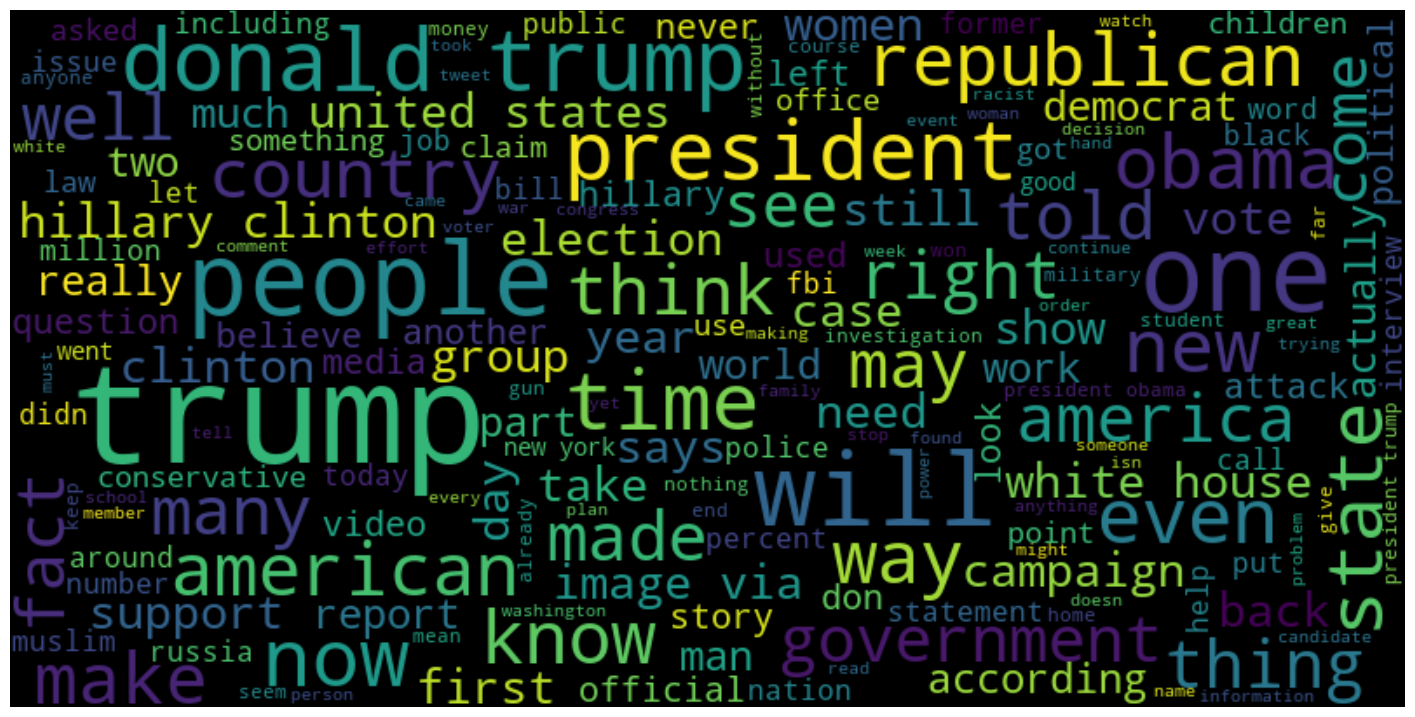

In [43]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


stop = set(STOPWORDS)
add_stop = ['saying','said','want','called','say','added','going']
stop.update(add_stop)

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = stop, random_state = 667)

wordcloud.generate(textfake)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

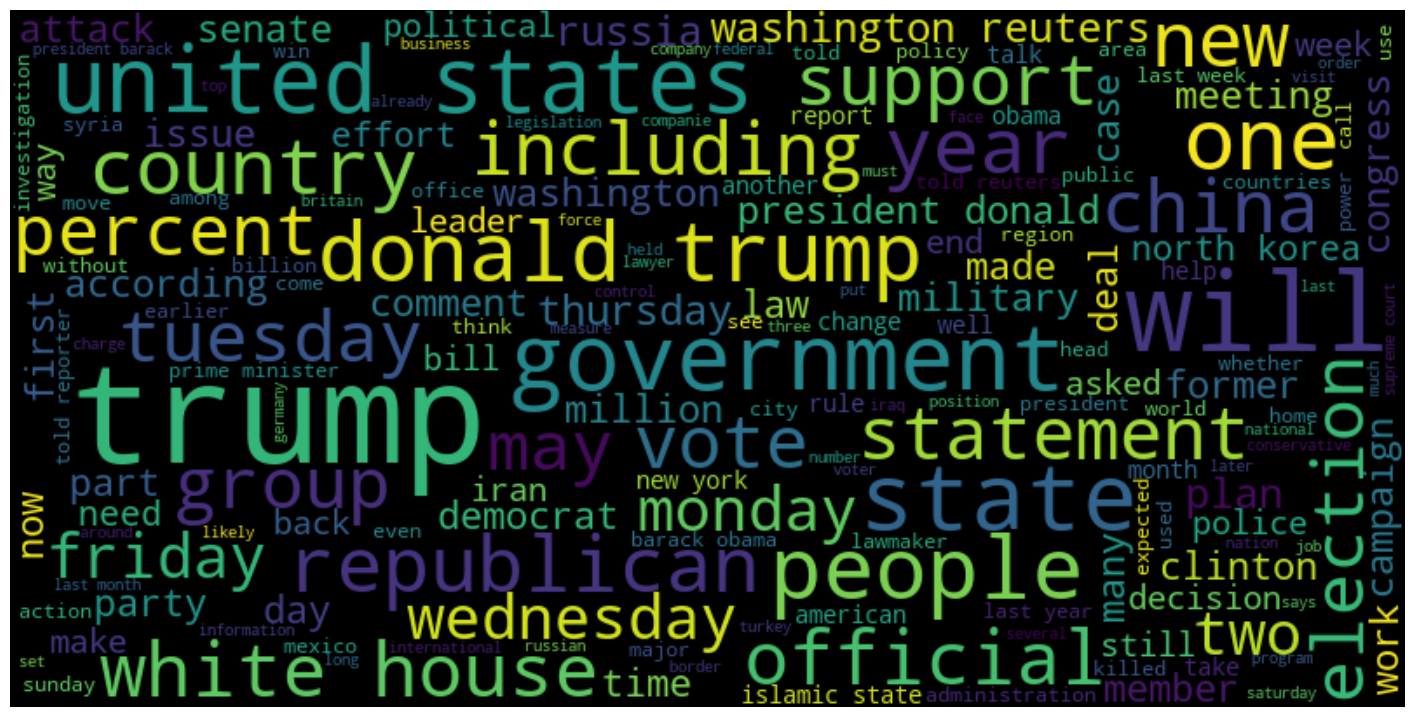

In [44]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


stop = set(STOPWORDS)
add_stop = ['saying','said','want','called','say','added','going']
stop.update(add_stop)

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = stop, random_state = 667)

wordcloud.generate(texttrue)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [45]:
X = df['text']
y = df['class']

In [46]:
##STEP 4: Vettorizzazione
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, min_df=4, max_df=0.9)
vectorizer = CountVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X).toarray()
X_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
##STEP 5: TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vect).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
##STEP 6: Split Training and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [49]:
##STEP 7: Modellazione
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.954

In [50]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.932

In [54]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
test_data_accuracy

0.96

Text(95.72222222222221, 0.5, 'Actual')

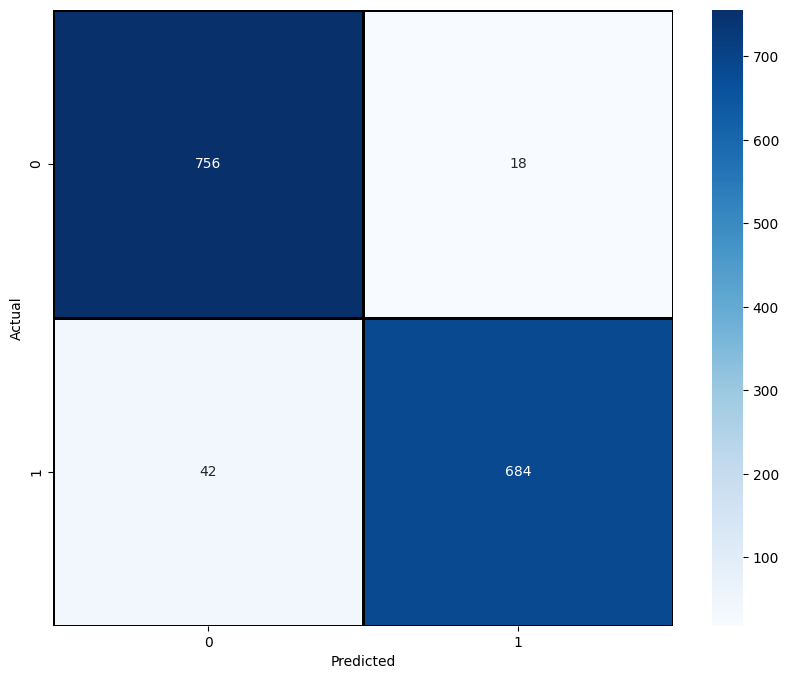

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       774
           1       0.97      0.94      0.96       726

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500



In [57]:
# Step 8: Pipeline Finale (nuovo train test split su dati raw testuali)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
#clf =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
clf = classifier = SGDClassifier()

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.978


In [59]:
# Step 10: Cross Validation
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.984  0.9712 0.9888 0.9808 0.9872 0.984  0.984  0.9872]
mean=0.9834
std=0.005180733538795456


In [60]:
import joblib
joblib.dump(pipe,'NLPEs1.pkl')

['NLPEs1.pkl']

In [65]:
import joblib

uploaded_model = joblib.load('NLPEs1.pkl')
pred = uploaded_model.predict(['President Barack Obama']) # 0 --> fake
pred[0]

0